# E7-PROJECT: Hotel Reservations

## 1. Loading data

In [1]:
# Import libraries for data analysis.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import libraries for machine learning.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Importing the dataset
data = pd.read_csv("Hotel Reservations.csv")

In [3]:
# Load the dataset into Pandas DataFrame.

data = pd.read_csv("Hotel Reservations.csv")
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")
print("Column names:")
print(data.columns.tolist())

Number of rows: 36275
Number of columns: 19
Column names:
['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']


In [4]:
# Check for missing values in the dataset.
data.isna().value_counts()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  type_of_meal_plan  required_car_parking_space  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  repeated_guest  no_of_previous_cancellations  no_of_previous_bookings_not_canceled  avg_price_per_room  no_of_special_requests  booking_status
False       False         False           False                 False              False              False                       False               False      False         False          False         False                False           False                         False                                 False               False                   False             36275
Name: count, dtype: int64

## 2. Data Exploration

In [5]:
# Import visualization library

import plotnine as p9

In [6]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [7]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


### 12 numeric fields
no_of_adults<br>
no_of_children<br>
no_of_weekend_nights<br>
no_of_week_nights<br>
arrival_year<br> 	
arrival_month<br> 	
arrival_date<br>
no_of_previous_cancellations<br> 	
no_of_previous_bookings_not_canceled<br> 	
no_of_special_requests<br>
lead_time ----- (histogram)<br>
avg_price_per_room ----- (histogram)<br>

### 7 categorical
Booking_ID <br>
type_of_meal_plan, no or 1-3<br>
room_type_reserved, 1-7<br>
market_segment_type <br>
required_car_parking_space<br>
repeated_guest<br> 	
booking_status<br>

In [8]:
# barplot function

def plot_a_barplot(x):
    plot = (p9.ggplot(
                data = data,
                mapping = p9.aes(x = x)
                ) +
                p9.geom_bar() +
                p9.geom_text(
                    p9.aes(label = p9.after_stat('count')),
                        stat = 'count',
                        nudge_y = -10,
                        va = 'top',
                        angle = 90
                    ) +
                p9.theme(figure_size = (12, 8))
                )
    return plot

In [9]:
# max / min date

def get_date_periods_by_field(field_name):
    
    date_periods = data.groupby(field_name)['Arrival_Date_Combined'].agg(
        **{
            'Start Date': 'min',
            'End Date': 'max'
        }
    )
    
    print(f"\n Date Period Analysis for: {field_name}")
    return date_periods

1
booking_status
Not_Canceled    668
Canceled        465
Name: count, dtype: int64
3.91%

2
booking_status
Not_Canceled    1023
Canceled         308
Name: count, dtype: int64
2.59%

3
booking_status
Not_Canceled    695
Canceled        403
Name: count, dtype: int64
3.39%

4
booking_status
Not_Canceled    853
Canceled        474
Name: count, dtype: int64
3.99%

5
booking_status
Not_Canceled    826
Canceled        328
Name: count, dtype: int64
2.76%

6
booking_status
Not_Canceled    829
Canceled        444
Name: count, dtype: int64
3.74%

7
booking_status
Not_Canceled    746
Canceled        364
Name: count, dtype: int64
3.06%

8
booking_status
Not_Canceled    842
Canceled        356
Name: count, dtype: int64
3.00%

9
booking_status
Not_Canceled    836
Canceled        294
Name: count, dtype: int64
2.47%

10
booking_status
Not_Canceled    771
Canceled        318
Name: count, dtype: int64
2.68%

11
booking_status
Not_Canceled    768
Canceled        330
Name: count, dtype: int64
2.78%

12
boo

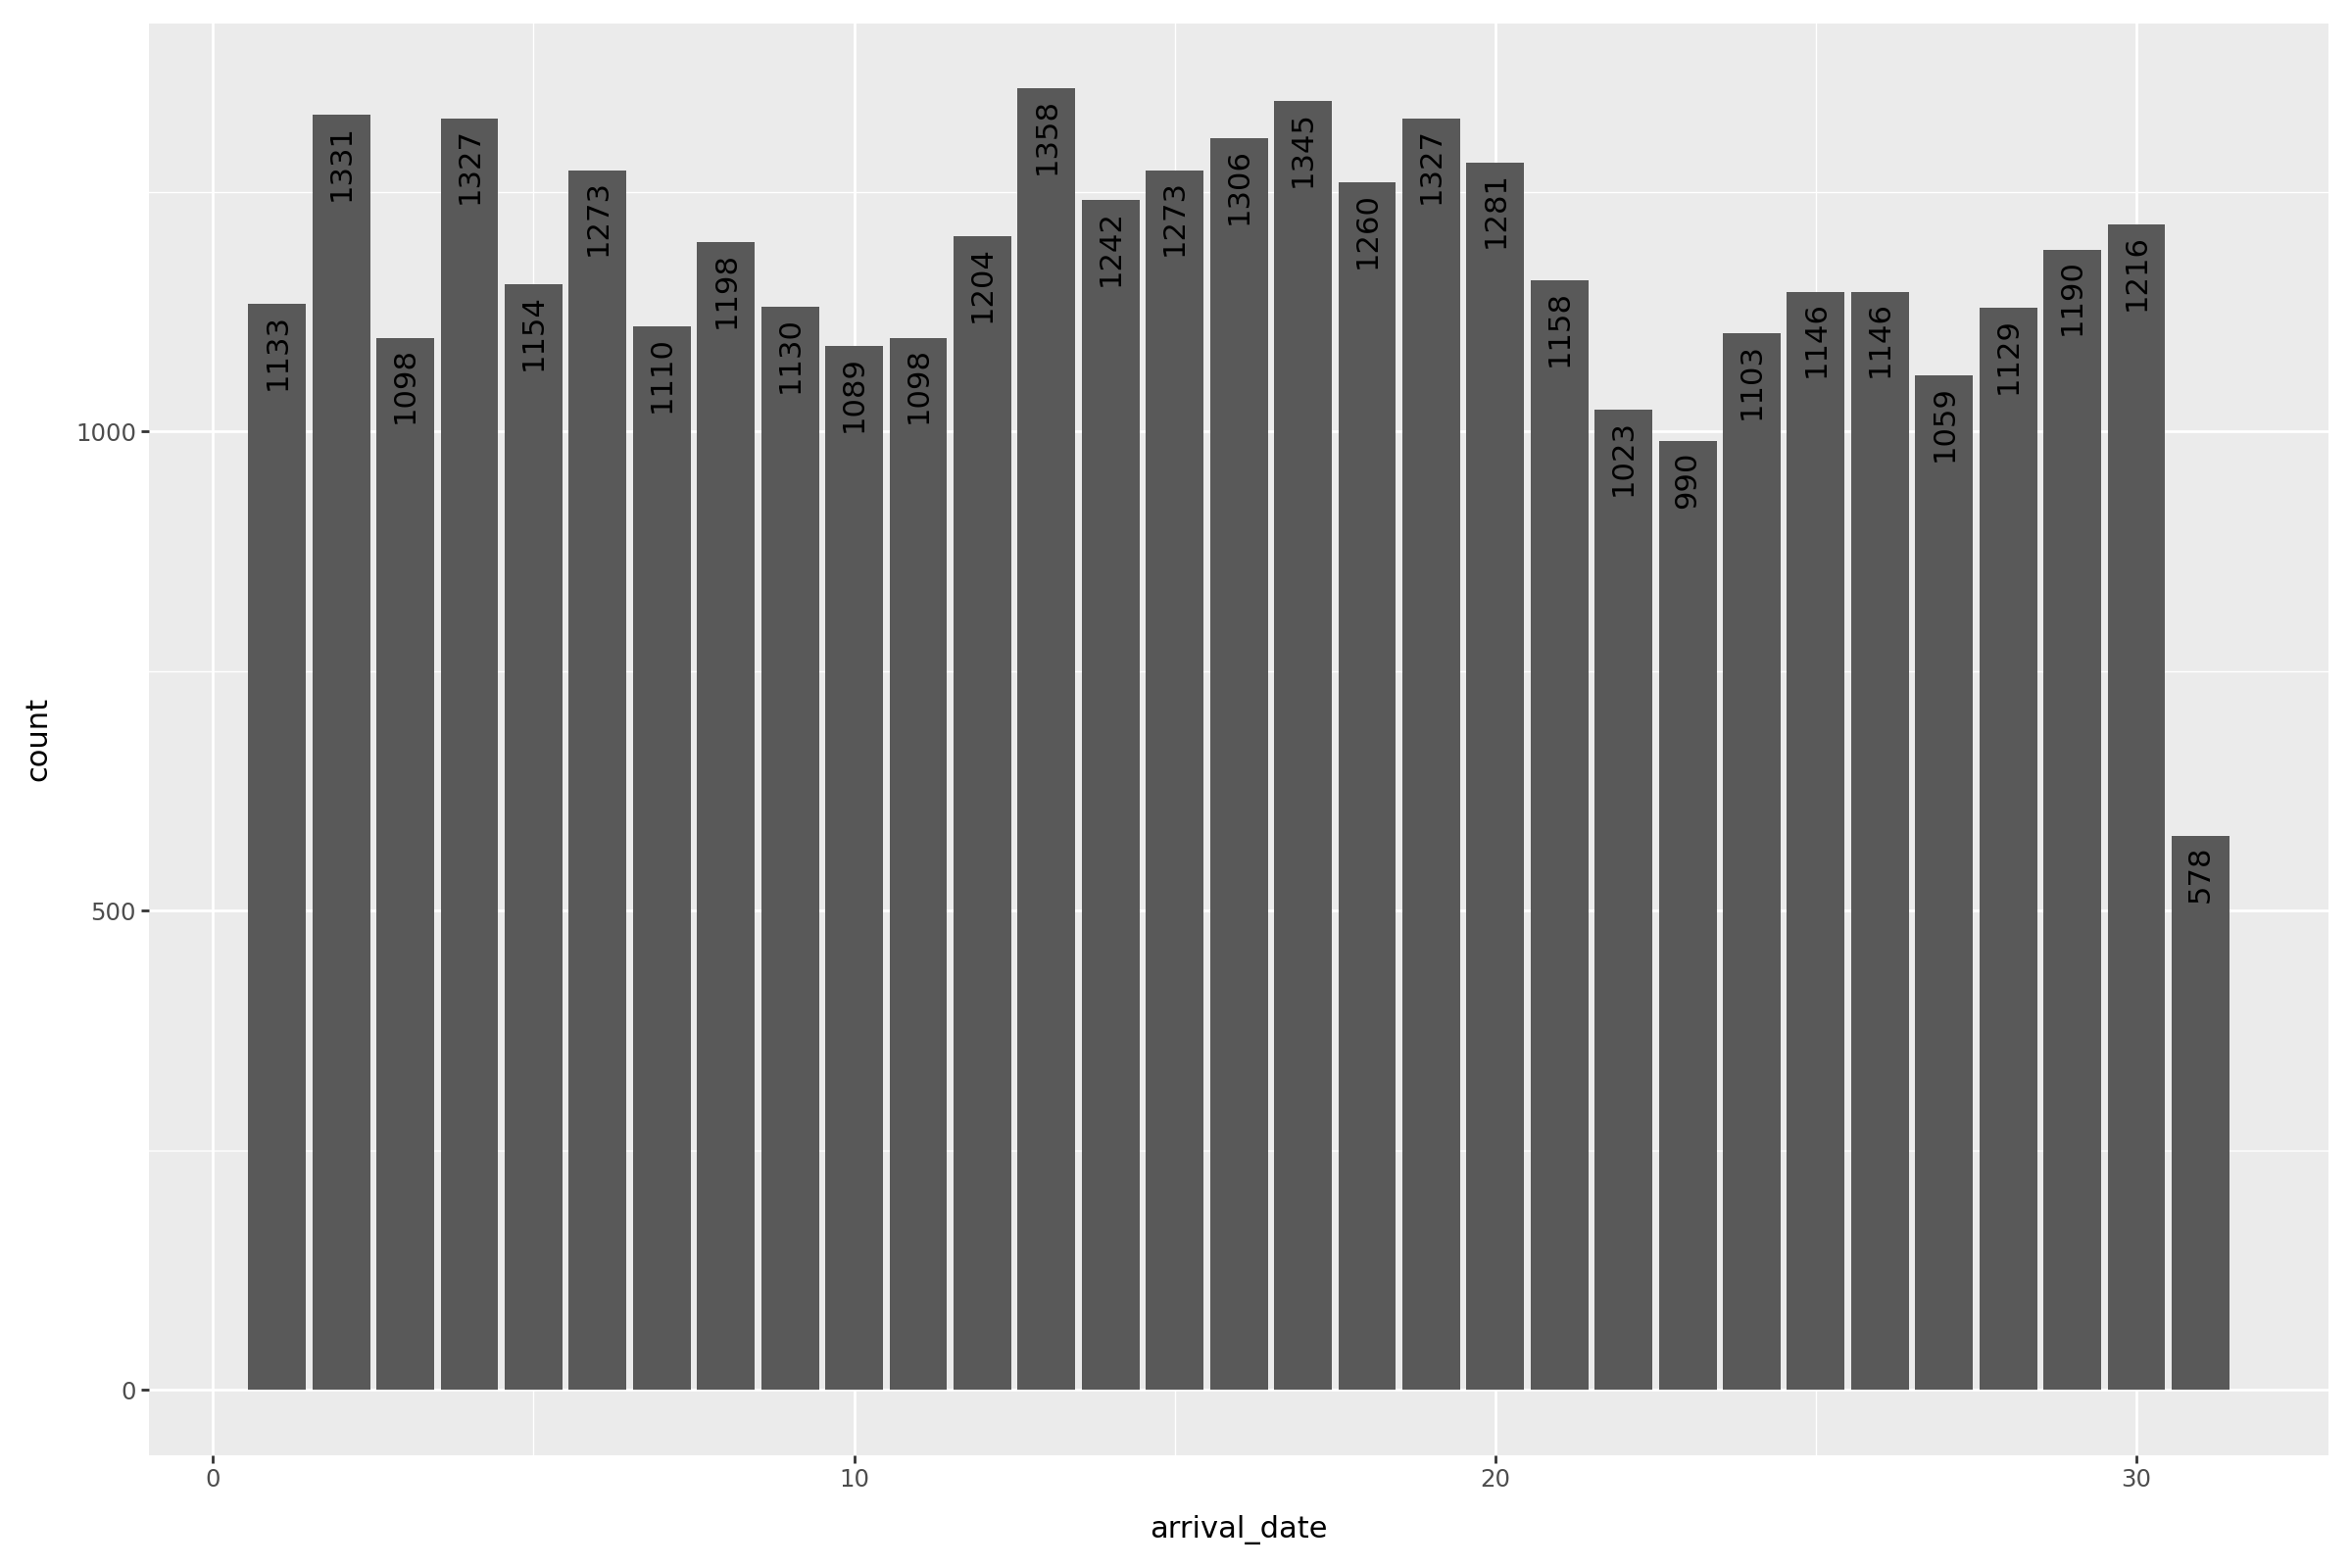

In [10]:
# PLOT + cancellation percentage for field values

# 7 categorical
#Booking_ID 
#type_of_meal_plan, no or 1-3
#room_type_reserved, 1-7
#market_segment_type 
#booking_status
cat = ["type_of_meal_plan", 
     "room_type_reserved",
     "market_segment_type",
     "booking_status",
      "repeated_guest",
      "required_car_parking_space"]

num = ["no_of_adults", "no_of_children",
       "no_of_weekend_nights", "no_of_week_nights",
       "no_of_week_nights",
       "arrival_year", "arrival_month", "arrival_date",
       "no_of_previous_cancellations",
       "no_of_previous_bookings_not_canceled", "no_of_special_requests", "lead_time", "avg_price_per_room"]

# Select a field to analyze, "arrival_date"
field = num[7] # or look at cat[]

values = data[field].unique()
values.sort()
total_cancellations = (data["booking_status"] == "Canceled").sum()

for value in values:
    res = data[data[field] == value]["booking_status"].value_counts()
    num_canceled = res.get('Canceled', 0)
    canceled_perc = num_canceled / total_cancellations * 100
    print(value)
    print(res)
    print(f"{canceled_perc:.2f}%")
    print()

plot_a_barplot(field)

In [11]:
# Check time period of a value
# Some values might be new for the hotel and have less instances

data['Arrival_Date_Combined'] = pd.to_datetime(
    data['arrival_year'].astype(str) + '-' +
    data['arrival_month'].astype(str) + '-' +
    data['arrival_date'].astype(str),
    errors='coerce' )

get_date_periods_by_field(field)


 Date Period Analysis for: arrival_date


,Start Date,End Date
arrival_date,,
1,2017-07-01,2018-12-01
2,2017-07-02,2018-12-02
3,2017-07-03,2018-12-03
4,2017-07-04,2018-12-04
5,2017-07-05,2018-12-05
6,2017-07-06,2018-12-06
7,2017-07-07,2018-12-07
8,2017-07-08,2018-12-08
9,2017-07-09,2018-12-09


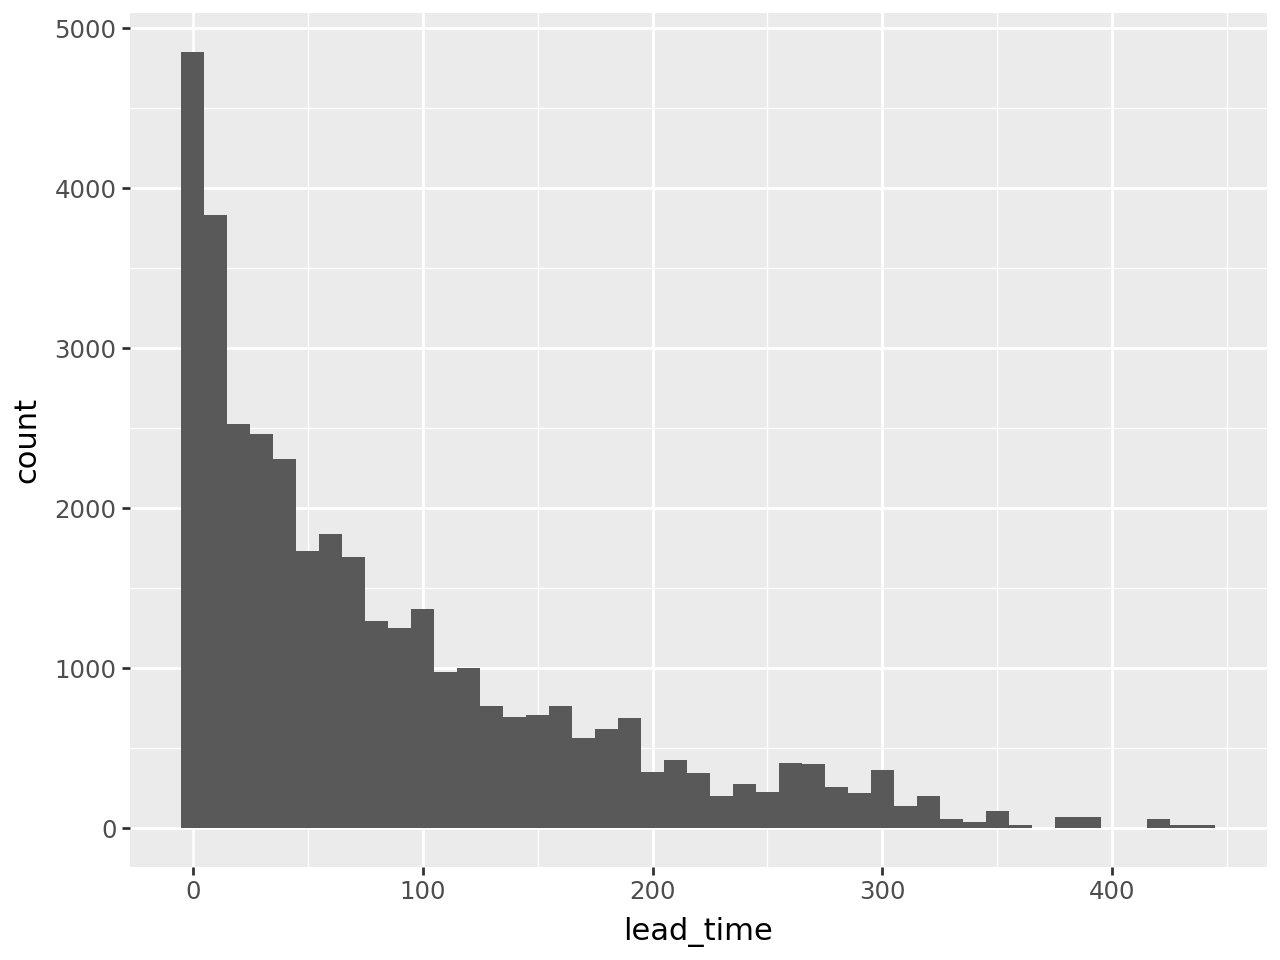

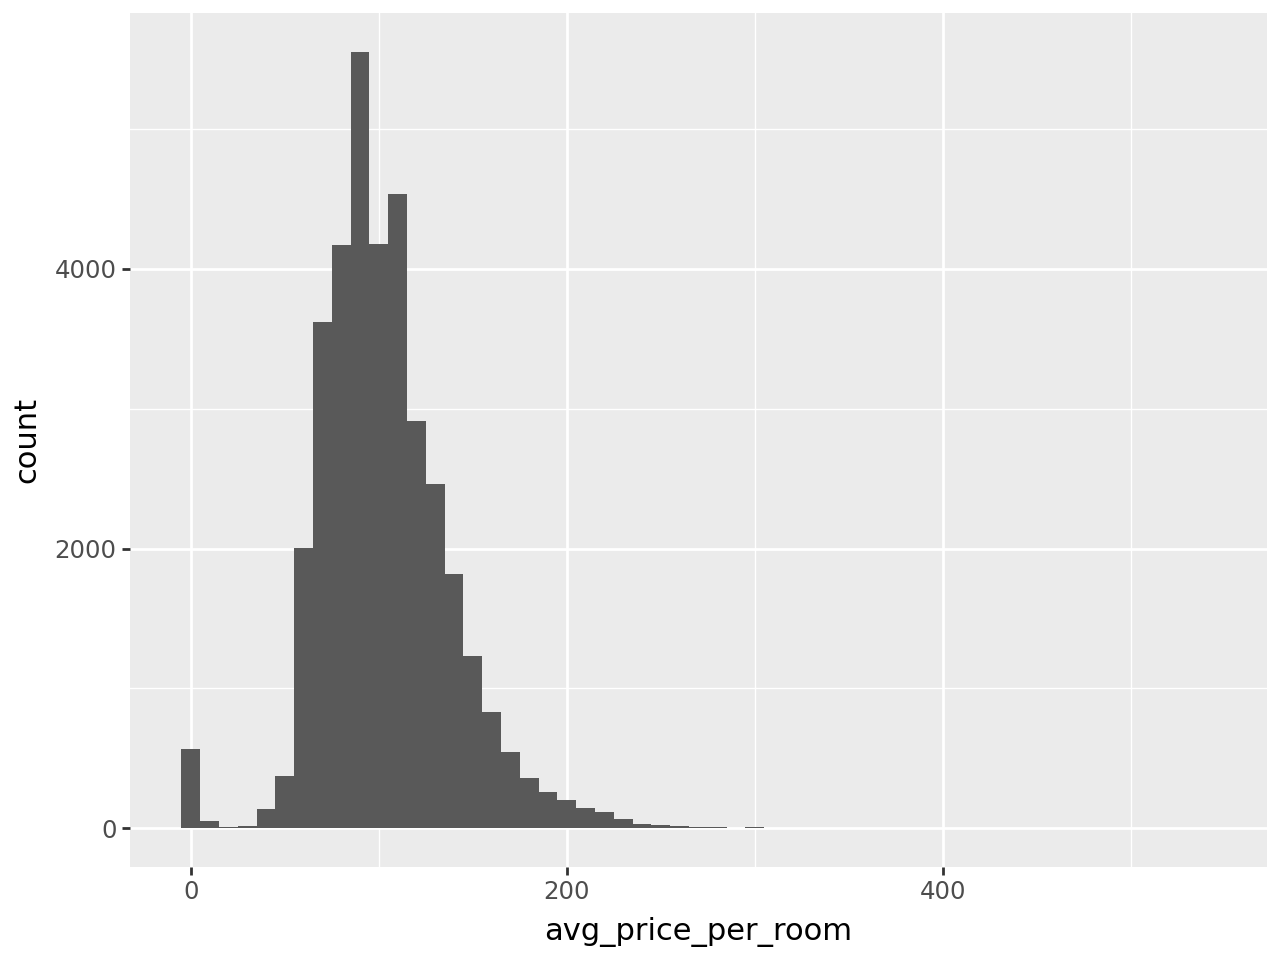

In [12]:
#HISTOGRAM

#lead_time (right skewed disrtibution)
#avg_price_per_room

lead_time_histogram = (p9.ggplot(
                            data = data,
                            mapping = p9.aes(x = "lead_time")
                            ) +
                            p9.geom_histogram(binwidth=10))#bins=20))
avg_price_per_room_histogram = (p9.ggplot(
                            data = data,
                            mapping = p9.aes(x = "avg_price_per_room")
                            ) +
                            p9.geom_histogram(binwidth=10))#bins=20))

lead_time_histogram.show()
avg_price_per_room_histogram.show()

In [13]:
import seaborn as sns

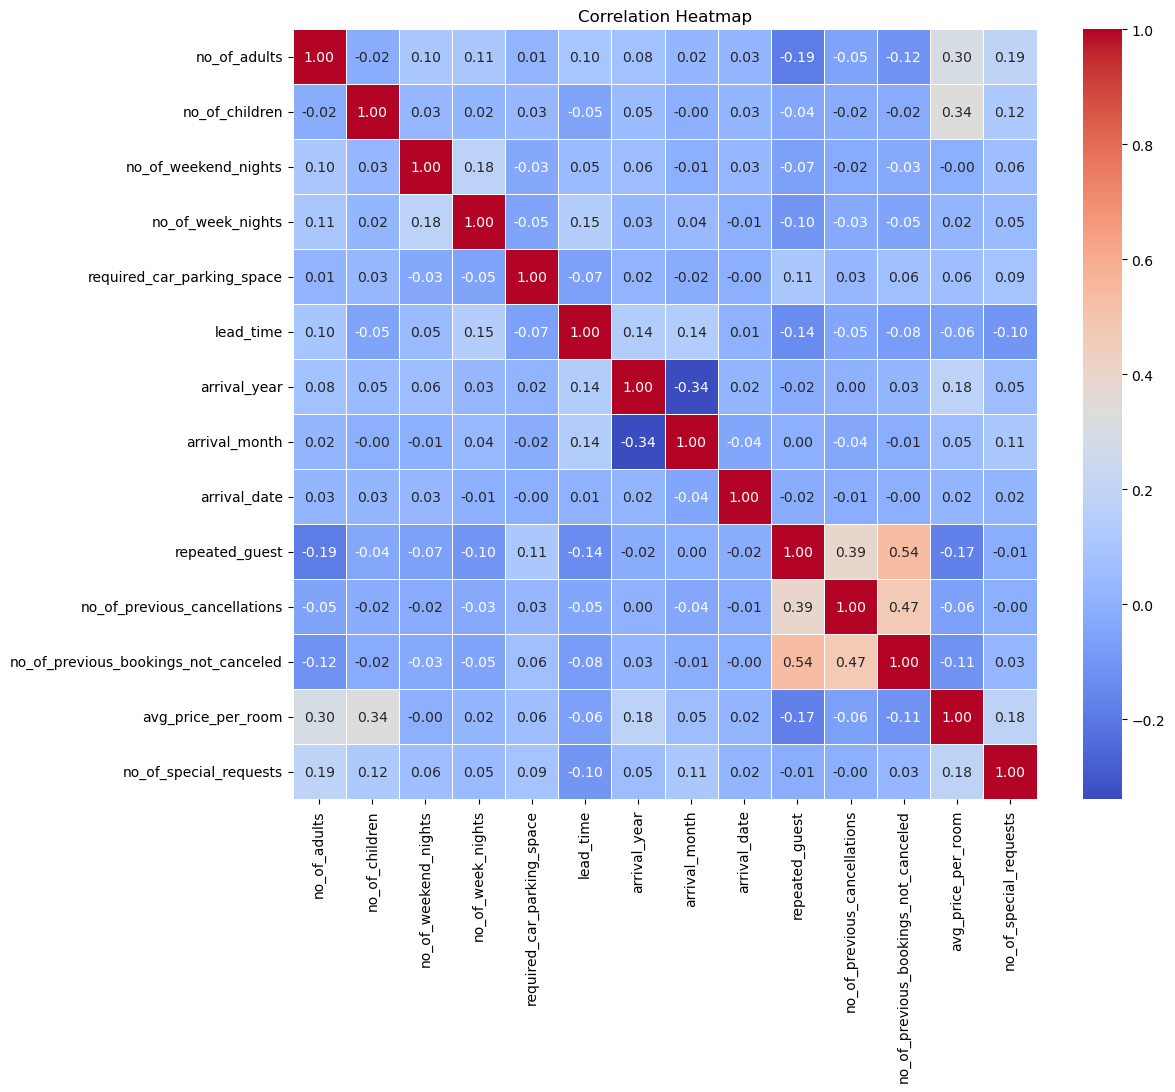

In [14]:
# 1. Calculate the correlation matrix
corr_matrix = data.select_dtypes(include=[np.number]).corr()

# 2. Set up the figure size
plt.figure(figsize=(12, 10))

# 3. Create the heatmap
sns.heatmap(corr_matrix, 
            annot=True,        # Show the numbers on the squares
            fmt=".2f",         # Format numbers to 2 decimal places
            cmap='coolwarm',   # Color map (Blue for low, Red for high)
            linewidths=0.5)    # Space between squares

# 4. Add title and show
plt.title("Correlation Heatmap")
plt.show()

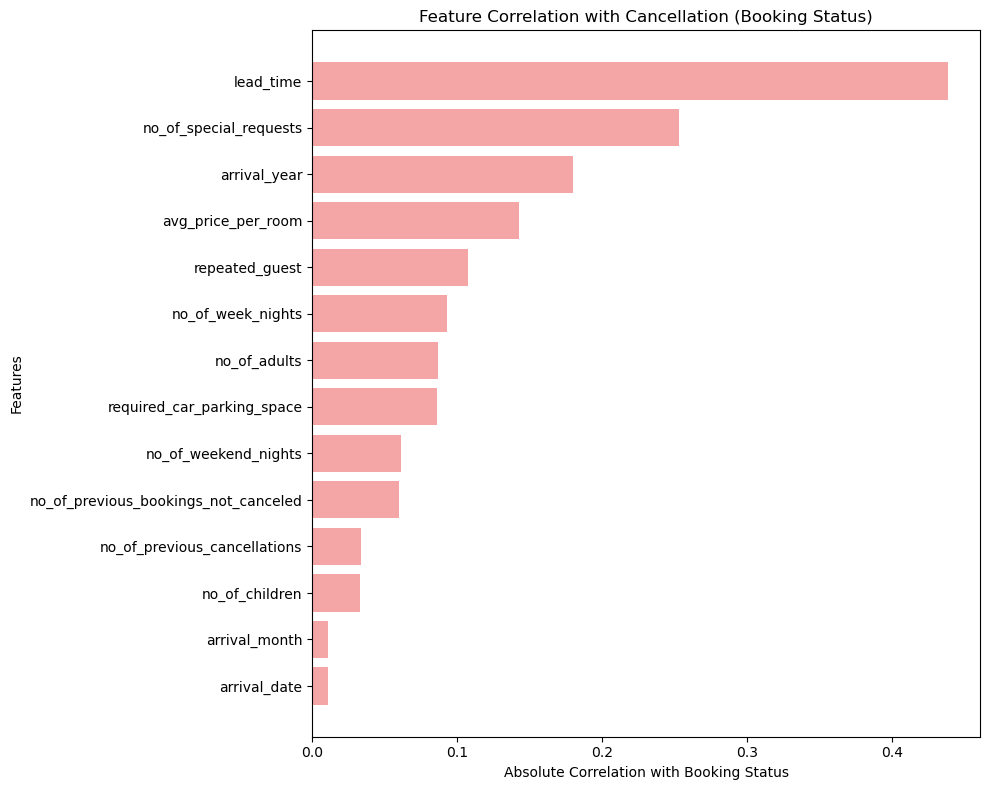

Top correlating features with booking_status:
lead_time                               0.438538
no_of_special_requests                  0.253070
arrival_year                            0.179529
avg_price_per_room                      0.142569
repeated_guest                          0.107287
no_of_week_nights                       0.092996
no_of_adults                            0.086920
required_car_parking_space              0.086185
no_of_weekend_nights                    0.061563
no_of_previous_bookings_not_canceled    0.060179
no_of_previous_cancellations            0.033728
no_of_children                          0.033078
arrival_month                           0.011233
arrival_date                            0.010629
Name: booking_status, dtype: float64


In [15]:
# Calculate correlation matrix first
# Create a temporary numeric version of booking_status
data_numeric = data.select_dtypes(include=[np.number]).copy()
data_numeric['booking_status'] = (data['booking_status'] == 'Not_Canceled').astype(int)

corr_matrix = data_numeric.corr()

# Get correlations with booking_status
correlations = corr_matrix['booking_status'].drop('booking_status').abs().sort_values(ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(correlations.index, correlations.values, color='lightcoral', alpha=0.7)
plt.xlabel('Absolute Correlation with Booking Status')
plt.ylabel('Features')
plt.title('Feature Correlation with Cancellation (Booking Status)')
plt.gca().invert_yaxis()  # Highest correlation at the top
plt.tight_layout()
plt.show()

# Also print the values
print("Top correlating features with booking_status:")
print(correlations)

## 3. Data preparation

In [16]:
# Removal of unwanted instances
clean_data = data.copy().drop(columns = "Booking_ID")
clean_data = clean_data.query('market_segment_type != "Complementary"') # all complementary reservations have a 100% no-cancellation rate

# Define the mapping dictionary
room_mapping = {
    "Room_Type 1": 1,
    "Room_Type 2": 2,
    "Room_Type 3": 3,
    "Room_Type 4": 4,
    "Room_Type 5": 5,
    "Room_Type 6": 6,
    "Room_Type 7": 7
}
meal_mapping = {
    "Not Selected" : 0,
    "Meal Plan 1" : 1,
    "Meal Plan 2" : 2,
    "Meal Plan 3" : 3
}
cancellation_mapping = {
    "Not_Canceled" : 0,
    "Canceled" : 1
}


# Apply the mapping to the column
clean_data["room_type_reserved"] = clean_data["room_type_reserved"].map(room_mapping)
clean_data["type_of_meal_plan"] = clean_data["type_of_meal_plan"].map(meal_mapping)
clean_data["booking_status"] = clean_data["booking_status"].map(cancellation_mapping)

# Removing feature-engineered column
clean_data = clean_data.drop(columns="Arrival_Date_Combined")

# One-hot-encoding
clean_data_dum = pd.get_dummies(clean_data)

# Show all columns
pd.set_option('display.max_columns', None)
clean_data_dum.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,market_segment_type_Aviation,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,1,0,1,224,2017,10,2,0,0,0,65.00,0,0,False,False,True,False
1,2,0,2,3,0,0,1,5,2018,11,6,0,0,0,106.68,1,0,False,False,False,True
2,1,0,2,1,1,0,1,1,2018,2,28,0,0,0,60.00,0,1,False,False,False,True
3,2,0,0,2,1,0,1,211,2018,5,20,0,0,0,100.00,0,1,False,False,False,True
4,2,0,1,1,0,0,1,48,2018,4,11,0,0,0,94.50,0,1,False,False,False,True


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Train test split (0.75, 0.25)
X = clean_data_dum.drop(columns="booking_status")
y = clean_data_dum["booking_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, train_size = 0.75)

## 3. Model training

#### 1. Logistic Regression
Testing logistical regression first as this is a simple algorithm for a starting point.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

In [20]:
# It is necessary to scale data beforehand for logistical regression, because some features have a long range
# and therefore would take a lot of time
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

log_reg_model = LogisticRegression(max_iter=10000)
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

#### 2. Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [22]:
rf_model = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
rf_model.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=1000, n_jobs=-1)

#### 3. XGBoost Classifier

In [23]:
# Install XGBoost if needed
# %pip install xgboost
from xgboost import XGBClassifier

# Instantiate and fit the model
xgb_model = XGBClassifier(
    n_estimators=1000,
    max_depth=8,
    learning_rate=0.025,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="auc",
    random_state=1
)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.025, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

## 4. Evaluation

In [24]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#### ROC AUC

Logistical Regression ROC AUC: 0.8645


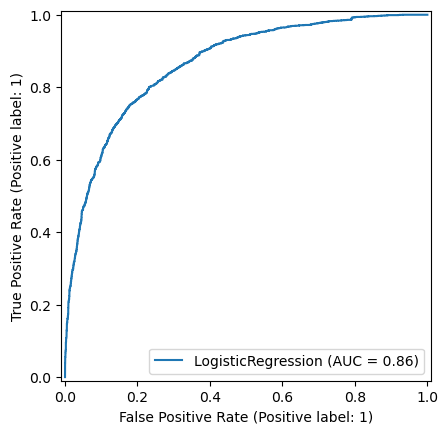

Random Forest ROC AUC: 0.9559


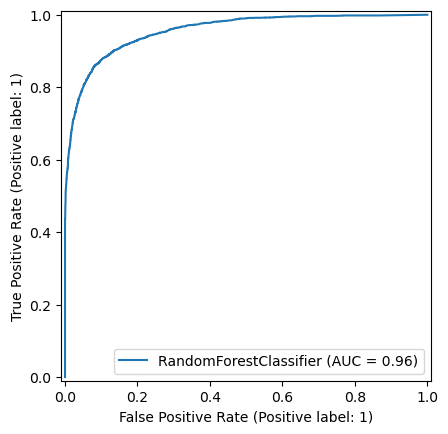

XGBoost ROC AUC: 0.9571


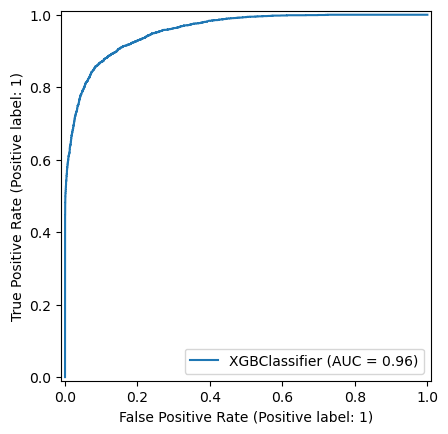

In [25]:
# Positive is "cancelled" (1)

# Logistical Regression on scaled data ROC AUC
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test_scaled)[:, 1]
auc_log_reg = roc_auc_score(y_test, y_pred_proba_log_reg)

print(f"Logistical Regression ROC AUC: {auc_log_reg:.4f}")

RocCurveDisplay.from_estimator(log_reg_model, X_test_scaled, y_test)
plt.show()

# Random Forest ROC AUC
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"Random Forest ROC AUC: {auc_rf:.4f}")

RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.show()

# XGBoost ROC AUC
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"XGBoost ROC AUC: {auc_xgb:.4f}")

RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.show()

In [26]:
# IF we want to use cross-validation though (can do multiple CV with different scoring):
#from sklearn.model_selection import cross_val_score
#from sklearn.pipeline import make_pipeline

#pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=100))

# Cross-Validation
#cv_scores = cross_val_score(
#    estimator=pipeline, # XGBClassifier(n_estimators=1000,max_depth=8,learning_rate=0.05,subsample=0.8,colsample_bytree=0.8,eval_metric="auc",random_state=42)
                        #RandomForestClassifier(n_estimators=1000)
#    X=X_train,
#    y=y_train,
#    cv=5, # number of folds
#    scoring='roc_auc',
#    n_jobs=-1
#)

#### Confusion Matrixes and recall

In [27]:
# Predictions
y_pred_log_reg = log_reg_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Logistical Regression
conf_mat_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix Logistical Regression:")
print(conf_mat_log_reg)

recall_log_reg = recall_score(y_test, y_pred_log_reg, zero_division=0)
print(f"Recall: {recall_log_reg:.4f}")
print()


# Random Forest
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix Random Forest:")
print(conf_mat_rf)

recall_rf = recall_score(y_test, y_pred_rf, zero_division=0)
print(f"Recall: {recall_rf:.4f}")
print()


#XGBoost
conf_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix XGBoost:")
print(conf_mat_xgb)

recall_log_reg = recall_score(y_test, y_pred_xgb, zero_division=0)
print(f"Recall: {recall_log_reg:.4f}")
print()

Confusion Matrix Logistical Regression:
[[5317  680]
 [1062 1912]]
Recall: 0.6429

Confusion Matrix Random Forest:
[[5649  348]
 [ 540 2434]]
Recall: 0.8184

Confusion Matrix XGBoost:
[[5635  362]
 [ 550 2424]]
Recall: 0.8151



#### Other measures

In [28]:
# 1. Accuracy
accuracy_log = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy Logistic Regression: {accuracy_log:.4f}")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Random Forest: {accuracy_rf:.4f}")
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy XGBoost: {accuracy_xgb:.4f}")
print()

# 2. Precision
# Precision is the ratio of correctly predicted positive observations to the total predicted positives.
precision_log = precision_score(y_test, y_pred_log_reg, zero_division=0)
print(f"Precision Logistic Regression: {precision_log:.4f}")
precision_rf = precision_score(y_test, y_pred_rf, zero_division=0)
print(f"Precision Random Forest: {precision_rf:.4f}")
precision_xgb = precision_score(y_test, y_pred_xgb, zero_division=0)
print(f"Precision XGBoost: {precision_xgb:.4f}")
print()

# 3. F1-Score
# The F1-score is the harmonic mean of Precision and Recall.
f1_log = f1_score(y_test, y_pred_log_reg, zero_division=0)
print(f"F1-Score Logistic Regression: {f1_log:.4f}")
f1_rf = f1_score(y_test, y_pred_rf, zero_division=0)
print(f"F1-Score Random Forest: {f1_rf:.4f}")
f1_xgb = f1_score(y_test, y_pred_xgb, zero_division=0)
print(f"F1-Score XGBoost: {f1_xgb:.4f}")

# 4. Cross-Validation scores (we choose the metric, currently roc_auc is set)
#print(f"Mean CV: {cv_scores.mean():.4f}")
#print(f"Standard Deviation of CV Accuracy: {cv_scores.std():.4f}")

Accuracy Logistic Regression: 0.8058
Accuracy Random Forest: 0.9010
Accuracy XGBoost: 0.8983

Precision Logistic Regression: 0.7377
Precision Random Forest: 0.8749
Precision XGBoost: 0.8701

F1-Score Logistic Regression: 0.6870
F1-Score Random Forest: 0.8457
F1-Score XGBoost: 0.8417


In [29]:
# Viewing the importance of features with lasso

from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

feature_names = X_train.columns 

# Lasso
# We MUST scale, otherwise coefficients are not comparable
pipeline = make_pipeline(StandardScaler(), Lasso(alpha=0.01)) # high alpha means that it is strict. 
pipeline.fit(X_train, y_train)

model = pipeline.named_steps['lasso']
coeffs = model.coef_

# Dataframe to view easily
importance = pd.DataFrame({
    'Feature': feature_names,
    'Abs_Importance': abs(coeffs)
})
importance = importance.sort_values(by='Abs_Importance', ascending=False, ignore_index=True)
print(importance)
importance.head(5)

                                 Feature  Abs_Importance
0                              lead_time        0.201374
1                 no_of_special_requests        0.142449
2             market_segment_type_Online        0.072455
3                     avg_price_per_room        0.063967
4            market_segment_type_Offline        0.034136
5                           arrival_year        0.022815
6             required_car_parking_space        0.016409
7                   no_of_weekend_nights        0.009599
8                          arrival_month        0.000502
9                      no_of_week_nights        0.000000
10                          no_of_adults        0.000000
11                        no_of_children        0.000000
12                        repeated_guest        0.000000
13                          arrival_date        0.000000
14                     type_of_meal_plan        0.000000
15                    room_type_reserved        0.000000
16          no_of_previous_canc

,Feature,Abs_Importance
0,lead_time,0.201374
1,no_of_special_requests,0.142449
2,market_segment_type_Online,0.072455
3,avg_price_per_room,0.063967
4,market_segment_type_Offline,0.034136


In [30]:
from sklearn.linear_model import LassoCV

# LassoCV automatically finds the best alpha
# eps=0.001 means it will check alphas as small as 1/1000th of the max alpha
lasso_cv = make_pipeline(StandardScaler(), LassoCV(cv=5, random_state=42, max_iter=5000))

lasso_cv.fit(X_train, y_train)

# Get the best alpha found
best_alpha = lasso_cv.named_steps['lassocv'].alpha_
print(f"The best alpha was: {best_alpha}")

# Get the coefficients from that best model
best_coefs = lasso_cv.named_steps['lassocv'].coef_

The best alpha was: 0.00020295023326901635


#### Revenue mitigation potential

In [31]:
# If it is possible to predict in advance if a customer is going to cancel and lead time plays a role in it,
# one solution could be to ask a confirmation of their stay at a later time. If they do not confirm, 
# the room will be canceled and potentially resold.

def calculate_financial_impact(y_test, y_pred, model_name):
    AVG_BOOKING_VALUE = data["avg_price_per_room"].mean()
    RE_BOOKING_RATE = 0.1 # Let's assume that 10% of the bookings are resold.   

    # Extract specific values from the confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # CALCULATE LOSS WITHOUT MODEL
    total_actual_cancellations = tp + fn  # Actual cancellations (Cancellation = 1)
    total_potential_loss = total_actual_cancellations * AVG_BOOKING_VALUE
    
    # CALCULATE REVENUE SAVED WITH MODEL
    revenue_saved = tp * AVG_BOOKING_VALUE * RE_BOOKING_RATE  # Correctly predicted cancellations
    
    # Calculate Percentage of Loss Mitigated
    if total_potential_loss > 0:
        percent_saved = (revenue_saved / total_potential_loss) * 100
    else:
        percent_saved = 0
        
    print(f"--- Financial Impact: {model_name} ---")
    print(f"Total Potential Loss (No Model): {total_potential_loss:,.2f}")
    print(f"Revenue Saved (With Model):      {revenue_saved:,.2f}")
    print(f"Percentage of Loss Mitigated:    {percent_saved:.2f}%")
    print()

# used models
calculate_financial_impact(y_test, y_pred_log_reg, "Logistic Regression")
calculate_financial_impact(y_test, y_pred_rf, "Random Forest")
calculate_financial_impact(y_test, y_pred_xgb, "XGBoost")

--- Financial Impact: Logistic Regression ---
Total Potential Loss (No Model): 307,581.61
Revenue Saved (With Model):      19,774.58
Percentage of Loss Mitigated:    6.43%

--- Financial Impact: Random Forest ---
Total Potential Loss (No Model): 307,581.61
Revenue Saved (With Model):      25,173.29
Percentage of Loss Mitigated:    8.18%

--- Financial Impact: XGBoost ---
Total Potential Loss (No Model): 307,581.61
Revenue Saved (With Model):      25,069.87
Percentage of Loss Mitigated:    8.15%

